# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [126]:
#Import all the necessary modules
# Evaluate using Cross Validation
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [127]:
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [128]:
data = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [129]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [130]:
#datatypes of each column
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [131]:
# shape of the dataset
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [132]:
# verify null value

data.isnull().any()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [133]:
clist=list(data)
clist

['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [134]:
## Replace all the 0s in the column with the median of the same column value accordingly

clist=list(data)
for (cName) in clist:
    
    #if cName = ('Preg' | 'class')
    if cName == 'Preg' or cName == 'class': 
        print("not valid to replace 0 in cloumn", cName) 
    else:
        data[cName]=data[cName].replace(0,data[cName].mean())


not valid to replace 0 in cloumn Preg
not valid to replace 0 in cloumn class


In [135]:
#data.sample(15)
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
714,3,102.0,74.0,20.536458,79.799479,29.5,0.121,32,0
212,7,179.0,95.0,31.000000,79.799479,34.2,0.164,60,0
287,1,119.0,86.0,39.000000,220.000000,45.6,0.808,29,1
713,0,134.0,58.0,20.000000,291.000000,26.4,0.352,21,0
467,0,97.0,64.0,36.000000,100.000000,36.8,0.600,25,0
321,3,112.0,74.0,30.000000,79.799479,31.6,0.197,25,1
93,4,134.0,72.0,20.536458,79.799479,23.8,0.277,60,1
209,7,184.0,84.0,33.000000,79.799479,35.5,0.355,41,1
514,3,99.0,54.0,19.000000,86.000000,25.6,0.154,24,0
443,8,108.0,70.0,20.536458,79.799479,30.5,0.955,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [136]:
#descriptive statistics of each & every column using describe() function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Plas,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
Pres,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
skin,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
test,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
mass,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

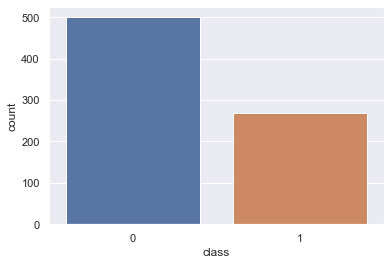

In [137]:
sns.set(style="darkgrid")
sns.countplot(x='class',data=data);

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


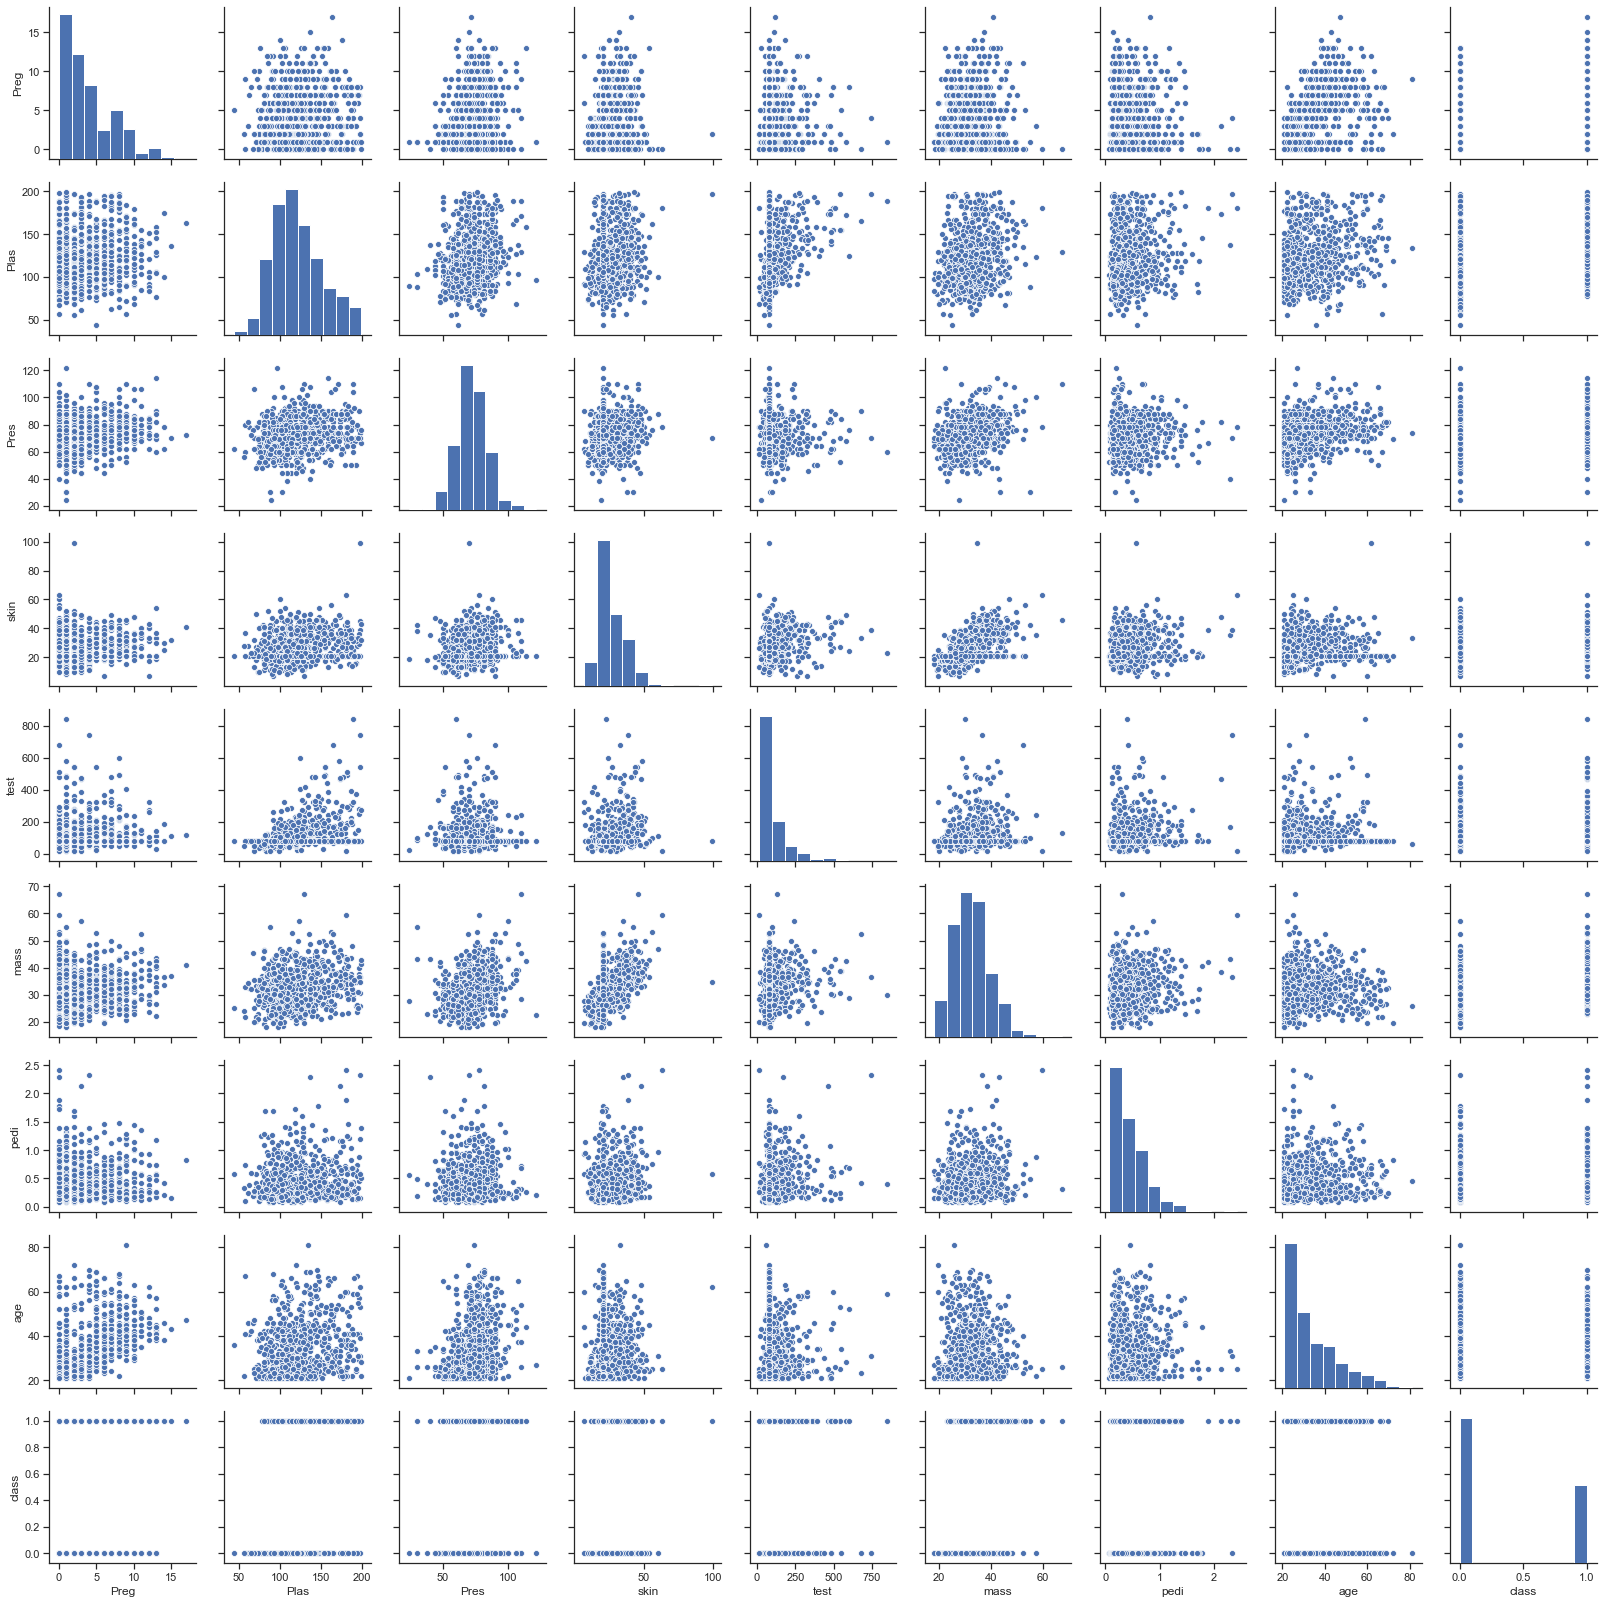

In [138]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data);

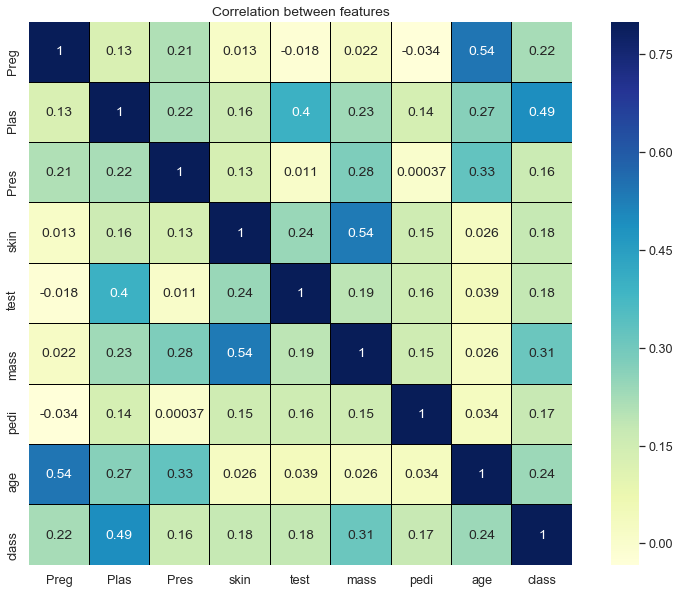

In [139]:
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

Good positive correlation observed between skin and mass 
very weak Positive correlation observed between pregnancy and age  
very weak correlation observe between plasma glucose and test 
depending on gaussian overlapping we can say that pres,skin,test,mass and pedi are not good features for deffrentiating the  class
depending on gaussian overlapping we can say that age,preg and plasma glucose are good features for deffrentiating the class


Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [140]:
X = data.drop('class', axis = 1)
y = data['class']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [142]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=20)

In [143]:
dt_model.fit(X_train, y_train)


0.8156424581005587
0.7445887445887446


# Q10 Print the accuracy of the model & print the confusion matrix 

Print the feature importance of the decision model - Optional

In [149]:
test_pred = dt_model.predict(X_test)
print("Train Accuracy", dt_model.score(X_train, y_train))
print("Train Accuracy",dt_model.score(X_test, y_test))


Train Accuracy 0.8156424581005587
Train Accuracy 0.7445887445887446


In [145]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier()
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[113,  31],
       [ 42,  45]], dtype=int64)

In [147]:
# Print the feature importance of the decision model 
print(final.feature_importances_)


[0.06140509 0.34759427 0.066115   0.09623611 0.04491965 0.13687932
 0.12414225 0.12270831]
